In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [7]:
#import data and convert into pandas dataframe object
stock_data = pd.read_csv('NVDA.csv' , index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-29,46.666000,49.081001,46.390999,48.784000,48.769402,701397000
2023-08-30,49.043999,49.926998,48.424999,49.264000,49.249252,735206000
2023-08-31,49.380001,49.743999,48.958000,49.355000,49.340225,528570000
2023-09-01,49.762001,49.799999,48.141998,48.508999,48.494484,463830000
2023-09-05,48.223000,48.851002,47.860001,48.548000,48.533470,382653000


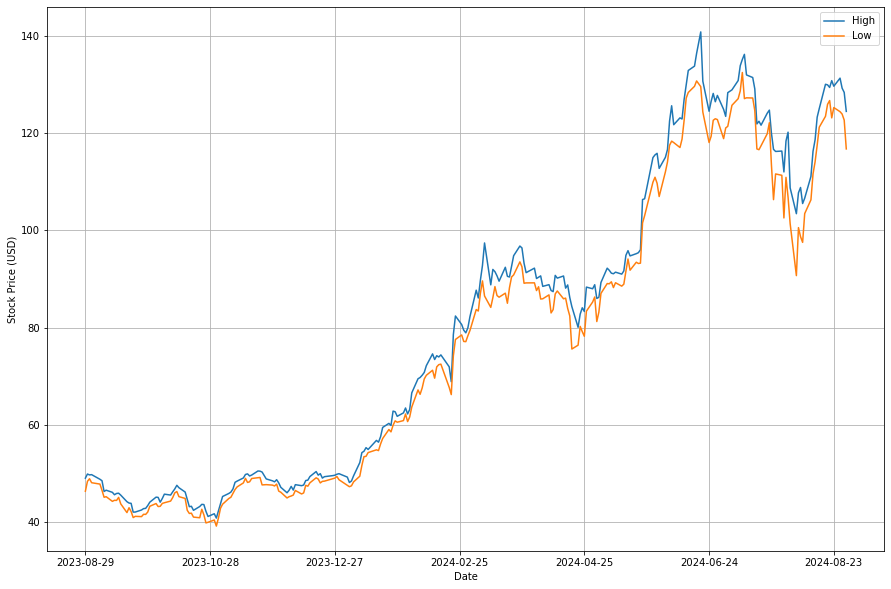

In [8]:
#create a figure to plot onto
plt.figure(figsize=(15,10))
#format date strings into datetime format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
#create array of dates
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]
#plot High and Low prices against date
plt.plot( x_dates, np.array(stock_data['High']), label='High')
plt.plot( x_dates, np.array(stock_data['Low']), label='Low')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid()
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

target_y = stock_data['Close']
x_feat = stock_data.iloc[:, 0:3]